## Ejercicio N°1
Dadas las siguientes tensiones y componentes de los circuitos a) y b), representar gráficamente, en el dominio del tiempo y de la frecuencia, la tensión y la corriente $(f = 50 \, \mathrm{Hz})$

<img src="img/tp5e1-1.png">

__a)__ ítem

Datos:
$\left\{
\begin{array}{l}
\displaystyle v(t) = 311,127 \sin \left( \omega t + {\pi \over 4} \right) \, \mathrm{V} \\
L = 1 \, \mathrm{H} \\
R = 10 \, \Omega
\end{array}
\right.$

__b)__ ítem

Datos:
$\left\{
\begin{array}{l}
v(t) = 311,127 \sin ( \omega t ) \, \mathrm{V} \\
C = 10 \, \mu \mathrm{F} \\
R = 0 \, \Omega
\end{array}
\right.$

### Solución
__a)__ ítem

Cálculo de $X_L$

$\begin{array}{l}
X_L = \omega L \\
\omega = 2 \pi f \\
X_L = 2 \pi (50) (1) = 314,16
\end{array}$

Impedancia inductiva-resistiva

$Z = (10 + j314,16) \, \Omega \quad \rightarrow \quad 314,34e^{j88,18^\circ} \, \Omega$

Dominio del tiempo

$\begin{array}{l}
v(t) = 311,127 \sin (\omega t + 45^\circ ) \, \mathrm{V} \\
i(t) = 0,7 \sqrt{2} \sin (\omega t - 43,18^\circ ) \, \mathrm{A}
\end{array}$

Dominio de la frecuencia

$\begin{array}{l}
 V_\mathrm{rms} = 220 e^{j45^\circ} \, \mathrm{V} \\
I_\mathrm{rms} = 0,7 e^{-j43,18^\circ} \, \mathrm{A}
\end{array}$

In [61]:
import math, cmath

In [62]:
# Datos:
v_a = cmath.rect(311.127 , math.pi/4) # V
v_b = cmath.rect(311.127 , 0) # V
L_a = 1 # H
C_b = 10e-6 # F
R_a = 10 # Ohm
R_b = 0 # Ohm
f = 50 # Hz
w = 2*math.pi*f

In [63]:
XL = w*L_a
XC = -1/(w*C_b)
Z_a = complex(R_a , XL)
Z_b = complex(R_b , XC)
Vrms_a = v_a/math.sqrt(2)
Irms_a = Vrms_a/Z_a
i_a = v_a/Z_a
i_b = v_b/Z_b
theta_ia = cmath.phase(i_a)
Vrms_b = v_b/math.sqrt(2)
Irms_b = Vrms_b/Z_b
theta_ib = cmath.phase(i_b)

In [64]:
print('Resultados:')
print('--------------------------------')
print('Z_a = {:.2f} Ohm'.format(Z_a))
print('Vrms_a (%.2f < %.2f°) V'%(abs(Vrms_a) , math.degrees( cmath.phase(Vrms_a) ) ))
print('Irms_a = (%.2f < %.2f°) A'%(abs(Irms_a) , math.degrees( cmath.phase(Irms_a) ) ))
print('--------------------------------')
print('Z_b = {:.2f} Ohm'.format(Z_b))
print('Vrms_b (%.2f < %.2f°) V'%(abs(Vrms_b) , math.degrees( cmath.phase(Vrms_b) ) ))
print('Irms_b = (%.1f < %.2f°) A'%(abs(Irms_b) , math.degrees( cmath.phase(Irms_b) ) ))
print('--------------------------------')

Resultados:
--------------------------------
Z_a = 10.00+314.16j Ohm
Vrms_a (220.00 < 45.00°) V
Irms_a = (0.70 < -43.18°) A
--------------------------------
Z_b = 0.00-318.31j Ohm
Vrms_b (220.00 < 0.00°) V
Irms_b = (0.7 < 90.00°) A
--------------------------------


__b)__ ítem

Datos:
$\left\{
\begin{array}{l}
v(t) = 311,127 \sin ( \omega t ) \, \mathrm{V} \\
C = 10 \, \mu \mathrm{F} \\
R = 0 \, \Omega
\end{array}
\right.$

Cálculo de $X_C$

$$ X_C = {1 \over j \omega C} = 0 - j318,31 \, \Omega $$

$$ Z = R + X_C = 0 - j318,31 \, \Omega $$

$$ Z = 318,31 \angle -90^\circ \, \Omega $$

$$ I = {v \over Z} = {311,127 \angle 0^\circ \over 318,31 \angle -90^\circ} = 0,9774 \angle 90^\circ \, \mathrm{A} $$

Dominio del tiempo:

$\begin{array}{l}
v(t) = 311,127 \sin ( \omega t + 45^\circ) \, \mathrm{V} \\
i(t) = 0,9774 \sin ( \omega t - 43,18^\circ) \, \mathrm{A}
\end{array}$

In [65]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
def va(t):
    return abs(v_a)*np.sin(w*t + np.pi/4)

In [67]:
def ia(t):
    return abs(i_a)*np.sin(w*t + theta_ia )

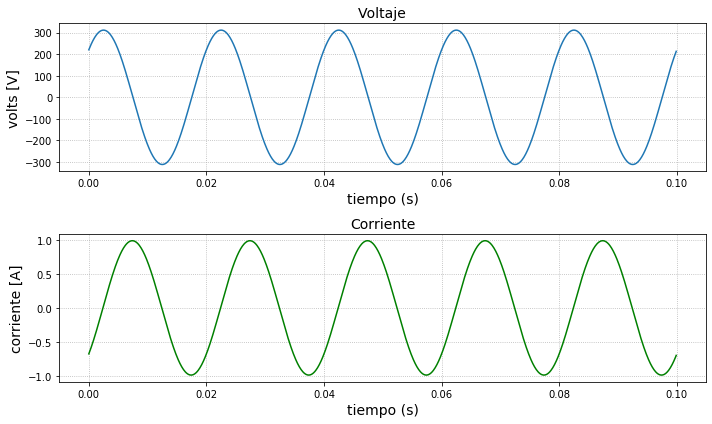

In [68]:
%matplotlib inline
plt.figure(figsize=(10,6))

t = np.arange(0, 0.1, 0.0001)

plt.subplot(211)
plt.plot(t, va(t))
plt.grid(linestyle=":")
plt.title('Voltaje', fontsize=14)
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('volts [V]', fontsize=14)

plt.subplot(212)
plt.plot(t, ia(t)  , color='green' )
plt.grid(linestyle=":")
plt.title('Corriente', fontsize=14)
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('corriente [A]', fontsize=14)

plt.draw()
plt.tight_layout()
plt.show()

In [69]:
def vb(t):
    return abs(v_b)*np.sin(w*t)

In [70]:
def ib(t):
    return abs(i_b)*np.sin(w*t + theta_ib )

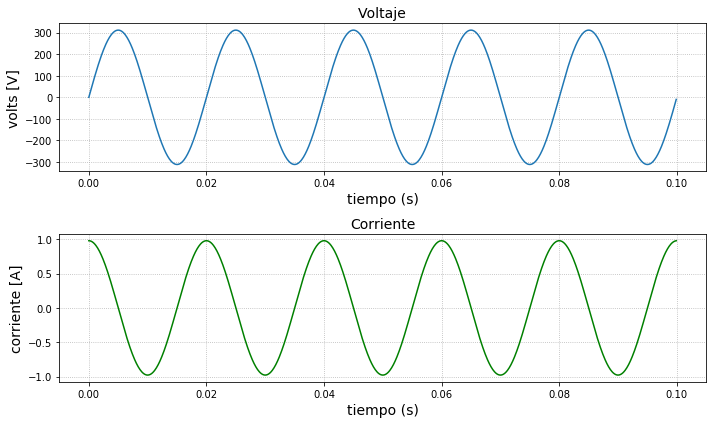

In [71]:
%matplotlib inline
plt.figure(figsize=(10,6))

t = np.arange(0, 0.1, 0.0001)

plt.subplot(211)
plt.plot(t, vb(t))
plt.grid(linestyle=":")
plt.title('Voltaje', fontsize=14)
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('volts [V]', fontsize=14)

plt.subplot(212)
plt.plot(t, ib(t)  , color='green' )
plt.grid(linestyle=":")
plt.title('Corriente', fontsize=14)
plt.xlabel('tiempo (s)', fontsize=14)
plt.ylabel('corriente [A]', fontsize=14)

plt.draw()
plt.tight_layout()
plt.show()

In [60]:
%reset -s -f

## Ejercicio N°2
Calcular las potencias P, Q, S del siguiente circuito y dibujar el triángulo de potencias.

<img src="img/tp5e2-1.png">

### Solución

In [20]:
# Datos:
Z1 = 9 + 4j # Ohm
Z2 = 9 + 24j # Ohm
Z3 = Z2 # Ohm
Z4 = Z3 # Ohm
U = 700 # V

In [21]:
import math, cmath
def prl(x,y):
    return (x*y)/(x + y)

In [22]:
# Cálculo de Zeq
Zeq = Z1 + prl( Z2 , prl(Z3,Z4) )
# Cálculo de It
It = U/Zeq
# Cálculo de S
S = U*It.conjugate()
# Cálculo de P
P = S.real
# Cálculo de Q
Q = S.imag
# Cálculo de phi
phi = cmath.phase(S)

In [23]:
print('Resultados:')
print('S = (%.2f < %.2f°) VA'%(abs(S) , math.degrees( phi ) ))
print('S = {:.2f} VA'.format(S))
print('P = %.2f W'%P)
print('Q = %.2f VAr'%Q)
print('phi = %.2f°'%( math.degrees(phi) ))

Resultados:
S = (28873.53 < 45.00°) VA
S = 20416.67+20416.67j VA
P = 20416.67 W
Q = 20416.67 VAr
phi = 45.00°


In [24]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


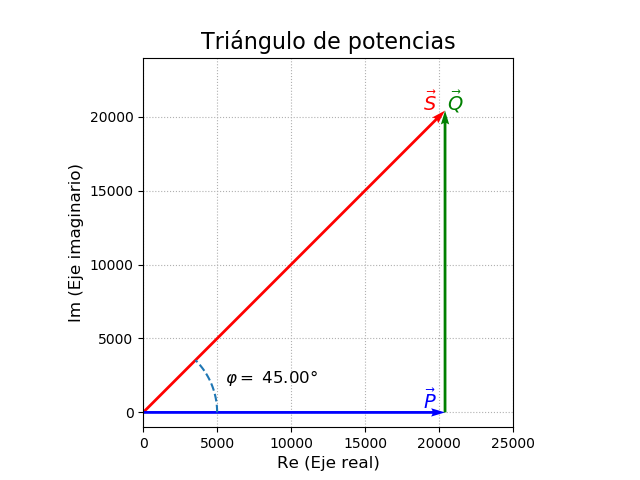

In [27]:
%matplotlib notebook
plt.figure()
ax = plt.gca()
ax.quiver(0,0,P,Q,angles='xy', scale_units='xy', scale=1, color='red' )
ax.quiver(0,0,P,0, angles='xy', scale_units='xy', scale=1, color='blue')
ax.quiver(P,0,0,Q, angles='xy', scale_units='xy', scale=1, color='green')
ax.set_xlim([0,25000])
ax.set_ylim([-1000,24000])
plt.text(P - 1500, Q, r'$\vec S$', fontsize=14, color='red', fontweight='bold')
plt.text(P - 1500,  200, r'$\vec P$', fontsize=14, color='blue', fontweight='bold')
plt.text(P + 100, Q, r'$\vec Q$', fontsize=14, color='green', fontweight='bold')
plt.text(5500,  2000, r'$\varphi =$ %.2f°'%( math.degrees(phi) ), fontsize=12)
theta = np.linspace(0, phi, 100) 
x1 = 5000 * np.cos(theta)
x2 = 5000 * np.sin(theta)
plt.plot(x1, x2, linestyle='--')
ax.set_aspect('equal')
ax.grid(linestyle=":")
plt.title('Triángulo de potencias', fontsize=16)
plt.xlabel('Re (Eje real)',  fontsize=12)
plt.ylabel('Im (Eje imaginario)',  fontsize=12)
ax.set_axisbelow(True)
plt.draw()
plt.show()

In [28]:
%reset -s -f

## Ejercicio N°3
Determinar el valor de la capacidad para lograr una corriente del 57,63% de la inicial que entrega la fuente.

<img src="img/tp5e3-1.png">

### Solución

Cálculo de $Z_{eq}$

$$ Z_{eq} = [ (Z_4 || Z_3) + Z_2 ] \, ||  \, Z_1 $$

$$ Z_{eq} = 38,06 \angle 80,56^\circ  \, \Omega \quad \rightarrow \quad 6,24 + j 37,54 \, \Omega$$

Cálculo de I

$$ I = \frac{U}{Z_{eq}} = 5,78 \angle -80,56^\circ \, \mathrm{A} $$

Cálculo de $S_1$

$$ S_1 = U \cdot I^\ast $$

$$ S_1 = 1271,81 \angle 80,56^\circ \, \mathrm{VA} \quad \rightarrow \quad 208,64 + j1254,57 \, \mathrm{VA} $$

Entonces:

$\begin{array}{l}
P_1 = 208,64 \, \mathrm{W} \\
Q_1 = 1254,57 \, \mathrm{VAr}
\end{array}$

Estado compensado

$$ |I_2| = |I_1| \cdot 0,5763 = 3,33 \, \mathrm{A} $$

Cálculo de $\varphi_2$

$$ P_1 = P_2 $$

$$ U I_1 \cos \varphi_1 = U I_2 \cos \varphi_2 $$

$$ \varphi_2 = \arccos {|I_1| \cos \varphi_1 \over |I_2|  } = 73,46^\circ $$

Cálculo de $Q_2$

$$ Q_2 = U I_2 \sin \varphi_2 = 702,62 \, \mathrm{VAr} $$

Cálculo de $Q_C$

$$ Q_C = Q_1 - Q_2 = 551,96 \, \mathrm{VAr} $$

Entonces

$$ Q_C = {U^2 \over X_C} = {U^2 \over 1/(\omega C)} = U^2 \omega C $$

$$ C = {Q_C \over \omega U^2} = {Q_C \over 2 \pi f U^2} = 36,3 \, \mu \mathrm{F} $$

In [29]:
# Datos:
Z1 = 15 + 75j # Ohm
Z2 = 5 + 0j # Ohm
Z3 = 10 + 150j # Ohm
Z4 = Z3
U = 220 # V
f = 50 # Hz

In [30]:
import math, cmath
def prl(x,y):
    return (x*y)/(x+y)

In [48]:
# Cálculo de Zeq
Zeq = prl( prl(Z4,Z3) + Z2 , Z1)
# Cálculo de I
I1 = U/Zeq
# Cálculo de S1
S1 = U*I.conjugate()
P1 = S1.real
Q1 = S1.imag
# Cálculo de I2
I2 = abs(I1)*0.5763
phi1 = -cmath.phase(I1)
phi2 = math.acos( abs(I1)*math.cos(phi1)/I2 )
Q2 = U*I2*math.sin(phi2)
P2 = P1
S2 = complex(P2,Q2)
Qc = Q1 - Q2
C = Qc/(2*math.pi*f*U**2)

In [53]:
print('Resultados:')
print('--------------------------------')
print('Zeq = (%.2f < %.2f°) Ohm'%(abs(Zeq) , math.degrees( cmath.phase(Zeq) ) ))
print('Zeq = {:.2f} Ohm'.format(Zeq))
print('I1 = (%.2f < %.2f°) A'%(abs(I1), math.degrees( cmath.phase(I1) ) ))
print('--------------------------------')
print('S1 = (%.2f < %.2f°) VA'%(abs(S1) , math.degrees( cmath.phase(S1) ) ))
print('S1 = {:.2f} VA'.format(S1))
print('P1 = %.2f W'%P1)
print('Q1 = %.2f VAr'%Q1)
print('--------------------------------')
print('|I2| = %.2f A'%I2)
print('phi2 = %.2f°'%( math.degrees(phi2) ))
print('I2 = (%.2f < %.2f°) A'%(I2 , -math.degrees(phi2) ))
print('--------------------------------')
print('Q2 = %.2f VAr'%Q2)
print('P2 = %.2f W'%P2)
print('S2 = {:.2f} VA'.format(S2))
print('S2 = (%.2f < %.2f°) VA'%(abs(S2), math.degrees( cmath.phase(S2) ) ))
print('--------------------------------')
print('Qc = %.2f VAr'%Qc)
print('C = %.2f uF'%(C*1e6))
print('--------------------------------')

Resultados:
--------------------------------
Zeq = (38.06 < 80.56°) Ohm
Zeq = 6.24+37.54j Ohm
I1 = (5.78 < -80.56°) A
--------------------------------
S1 = (1271.81 < 80.56°) VA
S1 = 208.64+1254.57j VA
P1 = 208.64 W
Q1 = 1254.57 VAr
--------------------------------
|I2| = 3.33 A
phi2 = 73.46°
I2 = (3.33 < -73.46°) A
--------------------------------
Q2 = 702.62 VAr
P2 = 208.64 W
S2 = 208.64+702.62j VA
S2 = (732.94 < 73.46°) VA
--------------------------------
Qc = 551.96 VAr
C = 36.30 uF
--------------------------------


In [ ]:
%reset -s -f

## Ejercicio N°4
Obtener el circuito de Thévenin entre los puntos a y b, y calcular la corriente que circularía si se conecta $R_C$.

<img src="img/tp5e4-1.png">

### Solución

Cálculo de $Z_{th}$

$$ Z_{th} = [(Z_4 + Z_2) \, || \, Z_3 ] + Z_5 $$

Voltaje de Thevenin

$$ U_{th} = U_\mathrm{ab} = U_{Z_3} $$

$$ U_{Z_3} = I \cdot Z_3 $$

Cálculo de *I*

$$ I = {U \over Z_2 + Z_3 + Z_4} $$

In [2]:
# Datos:
Z0 = 187.6 + 831.3j # Ohm
Z1 = Z0
Z2 = 0 + 21j # Ohm
Z3 = Z2
Z4 = Z3
Z5 = 123 + 17.1j # Ohm
U = 200 # V
Rc = 20 # Ohm

In [3]:
import math, cmath
def prl(x,y):
    return (x*y)/(x + y)

In [14]:
Zth = prl(Z4 + Z2, Z3) + Z5
I = U/(Z2 + Z3 + Z4)
Uth = I*Z3
Ic = Uth/(Zth + Rc)

In [16]:
print('Resultados:')
print('--------------------------------')
print('Zth = {:.2f} Ohm'.format(Zth))
print('Uth = (%.2f < %.2f°) V'%(abs(Uth) , math.degrees( cmath.phase(U) ) ) )
print('--------------------------------')
print('Ic = (%.2f < %.2f°) A'%(abs(Ic) , math.degrees( cmath.phase(Ic) ) ))
print('--------------------------------')

Resultados:
--------------------------------
Zth = 123.00+31.10j Ohm
Uth = (66.67 < 0.00°) V
--------------------------------
Ic = (0.46 < -12.27°) A
--------------------------------


In [17]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = 'styles/aeropython.css'
HTML(open(css_file, "r").read())